In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("forestfires.csv")
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [216]:
df.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

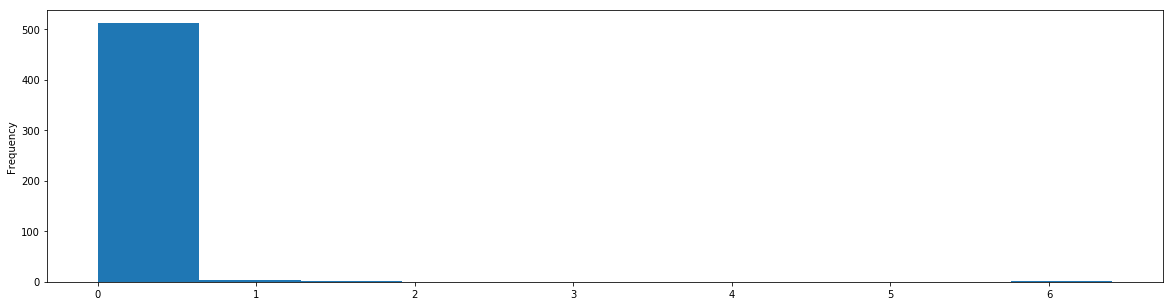

In [217]:
import matplotlib.pyplot as plt
df["rain"].plot.hist(bins=10,figsize=(20,5))

In [218]:
count=0
for index,rows in df.iterrows():
    if rows["ISI"]==0:
        count=count+1
print(count)

1


In [219]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [220]:
df.drop(["X","Y","month","day","rain"],axis=1,inplace=True)

In [221]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [222]:
list1=[0 for i in range(517)]
count=0
for index,rows in df.iterrows():
    if rows["area"]==0:
        list1[index]=0
    else:
        list1[index]=1

In [223]:
#print(list1)
area_b=pd.DataFrame(list1)

In [224]:
df=pd.concat([df,area_b],axis=1)
#df.drop(["area_b"],axis=1,inplace=True)

In [225]:
df.rename({0:"area_b"},axis=1,inplace=True)

In [226]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,area,area_b
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [227]:
df.drop(["area"],axis=1,inplace=True)

In [228]:
for index,rows in df.iterrows():
    if rows["ISI"]==0:
        rows["ISI"]=df["ISI"].mean()

In [229]:
count=0
for index,rows in df.iterrows():
    if rows["ISI"]==0:
        count=count+1
print(count)

1


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=df.drop("area_b",axis=1)
y=df["area_b"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

y_pred=logmodel.predict(x_test)
#print(x_test)
#print(y_pred)
#print(y_test)
#print(y_pred[270],y_test[270])

C:\Users\Prabal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5769230769230769

In [232]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,y_pred)
res

array([[27, 48],
       [18, 63]], dtype=int64)

In [233]:
from sklearn.model_selection import train_test_split
#x=df.drop("survived",axis=1)
#y=df["survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
from sklearn.tree import DecisionTreeClassifier
classifier_entropy=DecisionTreeClassifier(criterion="entropy",random_state=4,max_depth=3,min_samples_leaf=5)

#training the model
classifier_entropy.fit(x_train,y_train)

#making prediction
y_pred=classifier_entropy.predict(x_test)
#print(y_pred)
#print(y_test)
#print(y_pred[1],y_test[1])

from sklearn.metrics import accuracy_score
print("Score: ",accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,y_pred)
res

Score:  0.5865384615384616


array([[10, 40],
       [ 3, 51]], dtype=int64)